# Central Limit Theorem
In this experiment, we try to simulate the central limit theorem through two experiments: (1) a dice roll simulation and (2) a Galton board simulation. This notebook is inspired by [3Blue1Brown](https://www.youtube.com/watch?v=zeJD6dqJ5lo)'s explanation of CLT.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

## Dice roll simulation
In this experiment, we try to demonstrate CLT by rolling a die $N$ times. We expect that when the sample size N increases, the distribution of the sample mean or sum approximates a normal distribution.

In [33]:
def simulate_dice_roll(
    N: list = [1, 10, 100],
    trials: int = 10000,
    p: list = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
):
    """
    Simulates CLT using dice rolls.

    Args:
        N: list indicating number of times a die is rolled for each experiment
        trials: number of trials for each experiment
        p: probability distribution of the die used for the experiment
    """
    fig, ax = plt.subplots(1, 3, figsize=(20,3))
    fig.tight_layout()

    for i, n in enumerate(N):
        sums = np.zeros(trials)
        for j in range(trials):
            x = np.random.choice(
                np.array([1, 2, 3, 4, 5, 6]), 
                size=n,
                p=p,
            )
            sums[j] = np.sum(x)
        unique_sum, counts = np.unique(sums, return_counts=True)
        counts = counts / trials

        ax[i].bar(unique_sum, counts)
        ax[i].set_title(f"Dice roll simulation for {n} die/dice")

When rolling a fair die, we see that the CLT holds true. With $N=1$, the distribution of the "sum" (we only roll the die once) approximates that of a uniform distribution. However, when we increase the number of dice rolls to $N=10$ or $N=100$, the distribution of the roll sums better approximate that of a normal distribution.

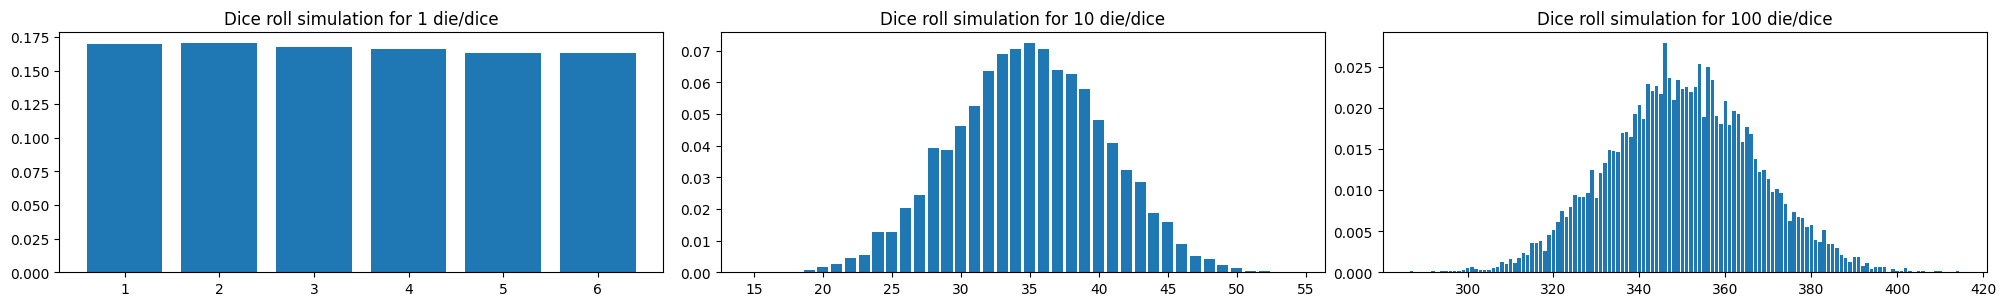

In [34]:
simulate_dice_roll()

Even for an unfair die (and regardless if the population is not normally distributed), the CLT still holds. We see that even with this die where $p(x=1) = p(x=6) = \frac{3}{12}$, $p(x=2) = p(x=5) = \frac{2}{12}$, and $p(x=3) = p(x=4) = \frac{1}{12}$, the sum of the dice rolls approximates a normal distribution with a larger $N$.

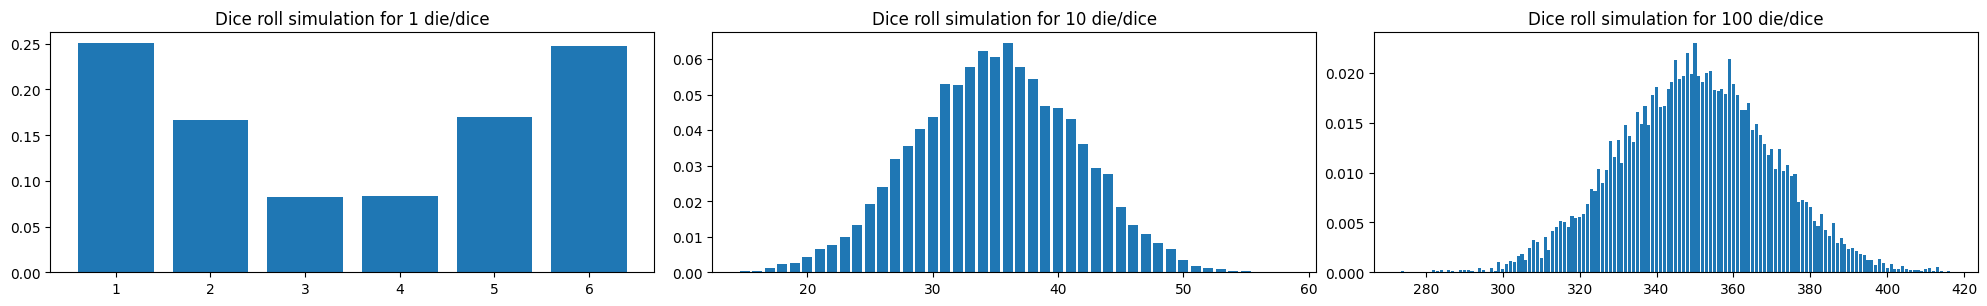

In [35]:
simulate_dice_roll(p=[3/12, 2/12, 1/12, 1/12, 2/12, 3/12])

## Galton board simulation
Another experiment that we can perform to simulate CLT is through a Galton board. In this experiment, we assume that the event of a ball dropping to a direction is independent. Moreover, we denote $x=1$ as the event that the ball drops to the right of the peg and $x=-1$ as the event that the ball drops to the left of the peg. This means that a sum of $-10$ for $N=10$ indicates that the ball dropped to the leftmost slot in the Galton board.

In [36]:
def simulate_galton_board(
    N: list = [1, 10, 100],
    trials: int = 10000,
    p: list = [0.5, 0.5]
):
    """
    Simulates CLT using the Galton board experiment.

    Args:
        N: list indicating number of peg levels for each Galton board experiment
        trials: number of trials for each Galton board experiment
        p: probability distribution of the ball direction after hitting a peg
    """
    fig, ax = plt.subplots(1, 3, figsize=(20,3))
    fig.tight_layout()

    for i, n in enumerate(N):
        pos = np.zeros(trials)
        for j in range(trials):
            x = np.random.choice(
                np.array([-1, 1]), 
                size=n,
                p=p,
            )
            pos[j] = np.sum(x)
        unique_pos, counts = np.unique(pos, return_counts=True)
        counts = counts / trials

        ax[i].bar(unique_pos, counts)
        ax[i].set_title(f"Galton board simulation for {n} peg level/s")

Similar to the dice roll experiment, we see that the CLT holds true for a fair Galton board. For $N=1$, it is equally likely that the ball will go to the left or to the right of the peg. For a larger $N$, we see an approximately normal distribution for the sums of the samples centered on 0, which is the center of the Galton board.

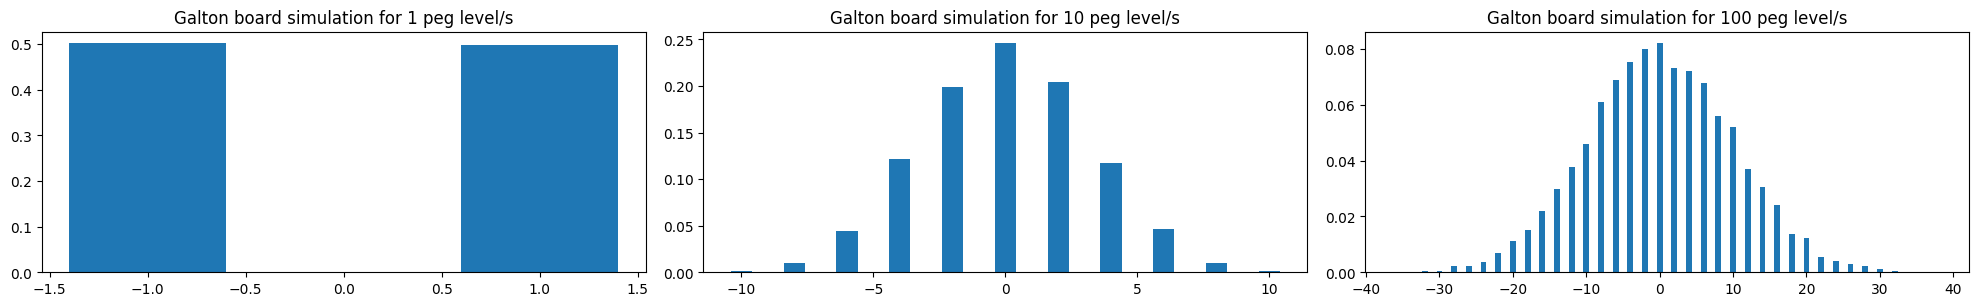

In [37]:
simulate_galton_board()

Finally, we also show that the CLT still holds true even if the probability of dropping to one side of the peg is greater than the other side. We see that for 1 peg, the "sum" is more concentrated towards the right side of the peg ($x=1$) since it has a higher probability. However, we see that the distribution of the sum tends to be normal when we increase the number of pegs in our board, even though the probability is not uniform and the population distribution is not normal.

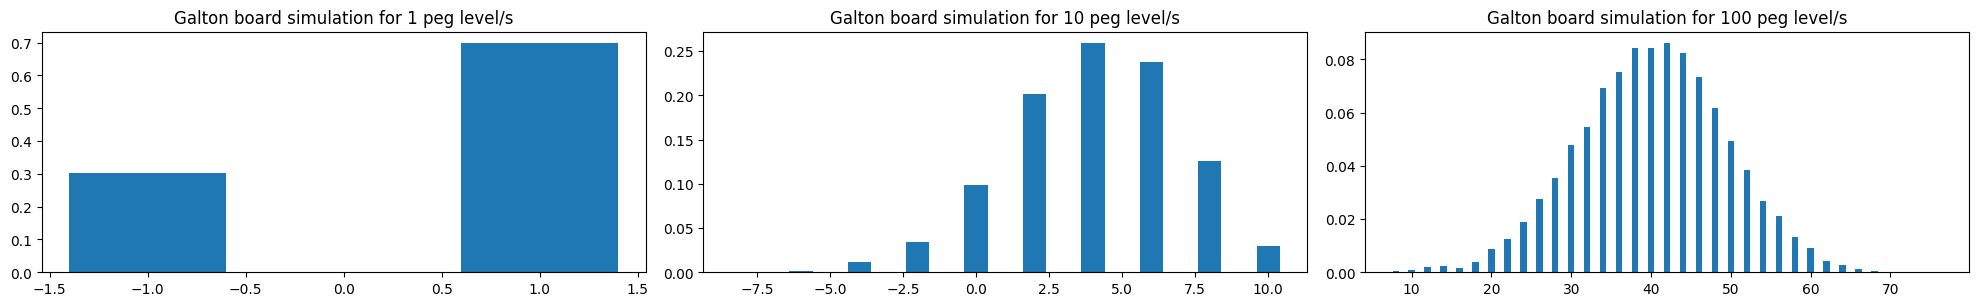

In [38]:
simulate_galton_board(p=[0.3, 0.7])